# PREDICTION OF AUTOMOTIVE ACCIDENT SEVERITY

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import os
import csv

In [3]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'pydotplus'

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

## DATA PREPROCESSING 

In [7]:
df1 = pd.read_csv('data/2014 excel.csv')
df2 = pd.read_csv('data/2015 excel.csv')
df3 = pd.read_csv('data/2016 excel.csv')

In [8]:
#merging files#
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [9]:
#deleting columns and data#
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)
result= result.dropna(axis=0)

In [10]:

#listing objects#
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']



In [11]:
#listing day

def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)


#listing weather conditions#

def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

#listing type of vehicle

def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)


#listing Time

def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#Dummies
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

#dealing with columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)


In [12]:
result

,Number of Vehicles,Casualty Severity,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Dry,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,...,Casualty Class_Driver,Casualty Class_Driver,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle,Type of Vehicle_other
0,1,Serious,19,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,1,Serious,19,1,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,Serious,21,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,1,Slight,23,1,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,Serious,60,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
5,2,Serious,41,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
6,2,Slight,61,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
7,2,Slight,26,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
8,1,Slight,23,1,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
9,1,Slight,7,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0


## RANDOM TREE

In [13]:
#dividing into train and test datasets

from sklearn.model_selection import train_test_split
  
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [14]:
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 

In [15]:
from sklearn.tree import DecisionTreeClassifier  
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)

In [17]:
seed=12345
np.random.seed(seed)

In [18]:
#defining the model evaluation procedure
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [21]:
score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 86.85% (standard deviation 1.33%)


In [22]:
importance = tree.feature_importances_
column_names = result.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 2:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 2 most important features in decision tree model are: '+str(important_features))


The 2 most important features in decision tree model are: ['Type of Vehicle_goods vehicle', 'Casualty Class_Passenger']


In [23]:
#Plotting decision tree

dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            out_file=None)  

graph=graph_from_dot_data(dot_data)

graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png', width=1000)

NameError: name 'graph_from_dot_data' is not defined

## STANDARDIZATION AND PCA ANALYSIS

In [15]:
#standardization 
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

D:\sw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\sw\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


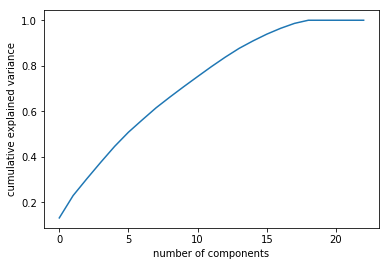

In [16]:
#choosing the number of components for PCA
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#the first 15 components contain approximately 90% of the variance

In [17]:
#PCA
pca = PCA(n_components=15)
X_2 = pca.fit_transform(X_1)

## NEURAL NETWORK

In [46]:
#one hot encoding
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.np_utils.to_categorical(encoded_y)

In [47]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(30, input_dim=15, activation='relu'))
    model.add(Dense(15, input_dim=30, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#“relu” activation function reduces likelihood of vanishing gradient
#using a “softmax” activation function ensuring that the output values are in the range of 0 and 1 and may be used as predicted probabilities
#when using the "categorical_crossentropy" loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample) 
#"Adam" optimizer realizes the benefits of both AdaGrad (Adaptive Gradient Algorithm) and RMSProp (Root Mean Square Propagation)

In [48]:
#define classifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#batch defines the number of samples to work through before updating the internal model parameters
#epoch defines the number of times that the learning algorithm will work through the entire training dataset
#verbose is a general programming term for produce lots of logging output; set to 0 (silent) not to slower the computation

In [50]:
#calculating results
results = cross_val_score(estimator, X_2, dummy_y, cv=kfold)

In [51]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results.mean()*100, results.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 85.83% (standard deviation 1.16%)
